<a href="https://colab.research.google.com/github/BlessingBassey/Certifications-and-some-solved-online-exercises/blob/master/4_12_2020_optimal_sensor_placement_with_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns

In [ ]:
# Reading the Data
data = pd.read_excel(r'/content/drive/MyDrive/Agric_SAIC/Smartfarm_April_2020.xlsx')
data

,Date/ Time,A1. Temp. (°C),A1. Humidity (%),A2. Temp. (°C),A2. Humidity (%),A3. Temp. (°C),A3. Humidity (%),A4. Temp. (°C),A4. Humidity (%),A5. Temp. (°C),A5. Humidity (%),A6. Temp. (°C),A6. Humidity (%),A7. Temp. (°C),A7. Humidity (%),B1. Temp. (°C),B1. Humidity (%),B2. Temp. (°C),B2. Humidity (%),B3. Temp. (°C),B3. Humidity (%),B4. Temp. (°C),B4. Humidity (%),B5. Temp. (°C),B5. Humidity (%),B6. Temp. (°C),B6. Humidity (%),B7. Temp. (°C),B7. Humidity (%),C1. Temp. (°C),C1. Humidity (%),C2. Temp. (°C),C2. Humidity (%),C3. Temp. (°C),C3. Humidity (%),C4. Temp. (°C),C4. Humidity (%),C5. Temp. (°C),C5. Humidity (%),C6. Temp. (°C),...,F2. Temp. (°C),F2. Humidity (%),F3. Temp. (°C),F3. Humidity (%),F4. Temp. (°C),F4. Humidity (%),F5. Temp. (°C),F5. Humidity (%),F6. Temp. (°C),F6. Humidity (%),F7. Temp. (°C),F7. Humidity (%),G1. Temp. (°C),G1. Humidity (%),G2. Temp. (°C),G2. Humidity (%),G3. Temp. (°C),G3. Humidity (%),G4. Temp. (°C),G4. Humidity (%),G5. Temp. (°C),G5. Humidity (%),G6. Temp. (°C),G6. Humidity (%),G7. Temp. (°C),G7. Humidity (%),H1. Temp. (°C),H1. Humidity (%),H2. Temp. (°C),H2. Humidity (%),H3. Temp. (°C),H3. Humidity (%),H4. Temp. (°C),H4. Humidity (%),H5. Temp. (°C),H5. Humidity (%),H6. Temp. (°C),H6. Humidity (%),H7. Temp. (°C),H7. Humidity (%)
0,2020-04-01 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,95.6,12.3,...,NaN,NaN,12.4,95.8,12.4,95.8,12.4,96.9,12.4,96.6,12.4,95.8,12.8,95.8,12.5,95.6,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.4,95.7,12.3,96.0,12.5,94.7,12.5,95.6
1,2020-04-01 00:01,12.7,95.6,12.8,95.4,12.6,97.5,12.6,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,95.9,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.6,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,...,12.6,95.2,12.4,96.0,12.4,95.8,12.4,96.9,12.4,96.6,12.4,95.8,12.8,95.8,12.5,95.6,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.3,96.0,12.5,94.7,12.5,95.6
2,2020-04-01 00:02,12.7,95.6,12.9,95.4,12.6,97.5,12.7,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,96.0,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.5,94.7,12.5,95.6
3,2020-04-01 00:03,12.7,95.6,12.9,95.5,12.7,97.6,12.7,95.3,12.7,96.0,12.6,95.7,12.5,96.0,12.7,95.6,12.7,96.0,12.7,95.3,12.8,96.0,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.9,95.2,12.6,95.6,12.4,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.6,94.8,12.5,95.6
4,2020-04-01 00:04,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.3,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.7,95.3,12.8,96.2,12.6,96.2,12.7,96.1,12.7,96.5,12.7,95.8,12.6,95.2,12.7,95.4,12.9,95.2,12.7,95.7,12.4,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.4,96.1,12.6,94.8,12.5,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,2020-04-30 23:55,17.6,91.0,17.8,90.5,17.5,92.7,17.6,90.5,17.6,91.4,17.5,91.2,17.4,91.5,17.5,91.6,17.6,91.5,17.7,90.8,17.6,91.7,17.6,91.3,17.6,91.3,17.5,91.7,17.5,91.6,17.5,90.6,17.7,90.1,17.9,90.2,17.7,90.5,17.4,...,17.7,90.2,17.4,90.7,17.6,90.2,17.5,91.2,17.4,91.6,17.6,90.5,17.8,91.6,17.4,91.0,17.4,91.5,17.3,91.7,17.3,92.3,17.2,92

In [ ]:
# Checking for missing values
data.isnull().sum()

Date/ Time              0
A1. Temp. (°C)       2592
A1. Humidity (%)     2592
A2. Temp. (°C)       2593
A2. Humidity (%)     2593
                     ... 
H5.  Humidity (%)    2649
H6. Temp. (°C)       2631
H6. Humidity (%)     2631
H7. Temp. (°C)       2640
H7.  Humidity (%)    2640
Length: 113, dtype: int64

In [ ]:
# Detecting the percentage of missing values in each variables
for col in data.columns:
    print(col + " has " + str(int(100 - (data[col].count()/len(data)*100))) + "% missig values")

Date/ Time has 0% missig values
A1. Temp. (°C) has 6% missig values
A1. Humidity (%) has 6% missig values
A2. Temp. (°C) has 6% missig values
A2. Humidity (%) has 6% missig values
A3. Temp. (°C) has 6% missig values
A3.  Humidity (%) has 6% missig values
A4. Temp. (°C) has 6% missig values
A4.  Humidity (%) has 6% missig values
A5. Temp. (°C) has 6% missig values
A5.  Humidity (%) has 6% missig values
A6. Temp. (°C) has 6% missig values
A6.  Humidity (%) has 6% missig values
A7. Temp. (°C) has 6% missig values
A7.  Humidity (%) has 6% missig values
B1. Temp. (°C) has 6% missig values
B1.  Humidity (%) has 6% missig values
B2. Temp. (°C) has 6% missig values
B2.  Humidity (%) has 6% missig values
B3. Temp. (°C) has 6% missig values
B3.  Humidity (%) has 6% missig values
B4. Temp. (°C) has 6% missig values
B4.  Humidity (%) has 6% missig values
B5. Temp. (°C) has 6% missig values
B5.  Humidity (%) has 6% missig values
B6. Temp. (°C) has 6% missig values
B6.  Humidity (%) has 6% missig va

In [ ]:
# Droping row values with any missing value
data = data.dropna(axis=0)

In [ ]:
data.head()

,Date/ Time,A1. Temp. (°C),A1. Humidity (%),A2. Temp. (°C),A2. Humidity (%),A3. Temp. (°C),A3. Humidity (%),A4. Temp. (°C),A4. Humidity (%),A5. Temp. (°C),A5. Humidity (%),A6. Temp. (°C),A6. Humidity (%),A7. Temp. (°C),A7. Humidity (%),B1. Temp. (°C),B1. Humidity (%),B2. Temp. (°C),B2. Humidity (%),B3. Temp. (°C),B3. Humidity (%),B4. Temp. (°C),B4. Humidity (%),B5. Temp. (°C),B5. Humidity (%),B6. Temp. (°C),B6. Humidity (%),B7. Temp. (°C),B7. Humidity (%),C1. Temp. (°C),C1. Humidity (%),C2. Temp. (°C),C2. Humidity (%),C3. Temp. (°C),C3. Humidity (%),C4. Temp. (°C),C4. Humidity (%),C5. Temp. (°C),C5. Humidity (%),C6. Temp. (°C),...,F2. Temp. (°C),F2. Humidity (%),F3. Temp. (°C),F3. Humidity (%),F4. Temp. (°C),F4. Humidity (%),F5. Temp. (°C),F5. Humidity (%),F6. Temp. (°C),F6. Humidity (%),F7. Temp. (°C),F7. Humidity (%),G1. Temp. (°C),G1. Humidity (%),G2. Temp. (°C),G2. Humidity (%),G3. Temp. (°C),G3. Humidity (%),G4. Temp. (°C),G4. Humidity (%),G5. Temp. (°C),G5. Humidity (%),G6. Temp. (°C),G6. Humidity (%),G7. Temp. (°C),G7. Humidity (%),H1. Temp. (°C),H1. Humidity (%),H2. Temp. (°C),H2. Humidity (%),H3. Temp. (°C),H3. Humidity (%),H4. Temp. (°C),H4. Humidity (%),H5. Temp. (°C),H5. Humidity (%),H6. Temp. (°C),H6. Humidity (%),H7. Temp. (°C),H7. Humidity (%)
1,2020-04-01 00:01,12.7,95.6,12.8,95.4,12.6,97.5,12.6,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,95.9,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.6,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,...,12.6,95.2,12.4,96.0,12.4,95.8,12.4,96.9,12.4,96.6,12.4,95.8,12.8,95.8,12.5,95.6,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.3,96.0,12.5,94.7,12.5,95.6
2,2020-04-01 00:02,12.7,95.6,12.9,95.4,12.6,97.5,12.7,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,96.0,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.5,94.7,12.5,95.6
3,2020-04-01 00:03,12.7,95.6,12.9,95.5,12.7,97.6,12.7,95.3,12.7,96.0,12.6,95.7,12.5,96.0,12.7,95.6,12.7,96.0,12.7,95.3,12.8,96.0,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.9,95.2,12.6,95.6,12.4,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.6,94.8,12.5,95.6
4,2020-04-01 00:04,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.3,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.7,95.3,12.8,96.2,12.6,96.2,12.7,96.1,12.7,96.5,12.7,95.8,12.6,95.2,12.7,95.4,12.9,95.2,12.7,95.7,12.4,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.4,96.1,12.6,94.8,12.5,95.6
5,2020-04-01 00:05,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.4,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.8,95.3,12.8,96.2,12.7,96.2,12.8,96.1,12.7,96.5,12.7,95.8,12.7,95.1,12.7,95.4,12.9,95.1,12.7,95.7,12.4,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.9,12.5,96.2,12.9,96.0,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.5,96.1,12.6,94.8,12.6,95.8


In [ ]:
#Let's check again to confirm
data.isnull().sum()

Date/ Time           0
A1. Temp. (°C)       0
A1. Humidity (%)     0
A2. Temp. (°C)       0
A2. Humidity (%)     0
                    ..
H5.  Humidity (%)    0
H6. Temp. (°C)       0
H6. Humidity (%)     0
H7. Temp. (°C)       0
H7.  Humidity (%)    0
Length: 113, dtype: int64

In [ ]:
# checking the data tyoe of the data
data.dtypes

Date/ Time            object
A1. Temp. (°C)       float64
A1. Humidity (%)     float64
A2. Temp. (°C)       float64
A2. Humidity (%)     float64
                      ...   
H5.  Humidity (%)    float64
H6. Temp. (°C)       float64
H6. Humidity (%)     float64
H7. Temp. (°C)       float64
H7.  Humidity (%)    float64
Length: 113, dtype: object

In [ ]:
# changning the 'Date/Time' column to what it ought to be
data['Date/ Time'] =  pd.to_datetime(data['Date/ Time'] )

In [ ]:
# confirming that the changes has taken effect
data.dtypes

Date/ Time           datetime64[ns]
A1. Temp. (°C)              float64
A1. Humidity (%)            float64
A2. Temp. (°C)              float64
A2. Humidity (%)            float64
                          ...      
H5.  Humidity (%)           float64
H6. Temp. (°C)              float64
H6. Humidity (%)            float64
H7. Temp. (°C)              float64
H7.  Humidity (%)           float64
Length: 113, dtype: object

In [ ]:
data.columns

Index(['Date/ Time', 'A1. Temp. (°C)', 'A1. Humidity (%)', 'A2. Temp. (°C)',
       'A2. Humidity (%)', 'A3. Temp. (°C)', 'A3.  Humidity (%)',
       'A4. Temp. (°C)', 'A4.  Humidity (%)', 'A5. Temp. (°C)',
       ...
       'H3. Temp. (°C)', 'H3.  Humidity (%)', 'H4. Temp. (°C)',
       'H4.  Humidity (%)', 'H5. Temp. (°C)', 'H5.  Humidity (%)',
       'H6. Temp. (°C)', 'H6. Humidity (%)', 'H7. Temp. (°C)',
       'H7.  Humidity (%)'],
      dtype='object', length=113)

In [ ]:
new_data = data.copy()

new_data.pop('Date/ Time')

1       2020-04-01 00:01:00
2       2020-04-01 00:02:00
3       2020-04-01 00:03:00
4       2020-04-01 00:04:00
5       2020-04-01 00:05:00
                ...        
43195   2020-04-30 23:55:00
43196   2020-04-30 23:56:00
43197   2020-04-30 23:57:00
43198   2020-04-30 23:58:00
43199   2020-04-30 23:59:00
Name: Date/ Time, Length: 37463, dtype: datetime64[ns]

In [ ]:
new_data.head()

,A1. Temp. (°C),A1. Humidity (%),A2. Temp. (°C),A2. Humidity (%),A3. Temp. (°C),A3. Humidity (%),A4. Temp. (°C),A4. Humidity (%),A5. Temp. (°C),A5. Humidity (%),A6. Temp. (°C),A6. Humidity (%),A7. Temp. (°C),A7. Humidity (%),B1. Temp. (°C),B1. Humidity (%),B2. Temp. (°C),B2. Humidity (%),B3. Temp. (°C),B3. Humidity (%),B4. Temp. (°C),B4. Humidity (%),B5. Temp. (°C),B5. Humidity (%),B6. Temp. (°C),B6. Humidity (%),B7. Temp. (°C),B7. Humidity (%),C1. Temp. (°C),C1. Humidity (%),C2. Temp. (°C),C2. Humidity (%),C3. Temp. (°C),C3. Humidity (%),C4. Temp. (°C),C4. Humidity (%),C5. Temp. (°C),C5. Humidity (%),C6. Temp. (°C),C6. Humidity (%),...,F2. Temp. (°C),F2. Humidity (%),F3. Temp. (°C),F3. Humidity (%),F4. Temp. (°C),F4. Humidity (%),F5. Temp. (°C),F5. Humidity (%),F6. Temp. (°C),F6. Humidity (%),F7. Temp. (°C),F7. Humidity (%),G1. Temp. (°C),G1. Humidity (%),G2. Temp. (°C),G2. Humidity (%),G3. Temp. (°C),G3. Humidity (%),G4. Temp. (°C),G4. Humidity (%),G5. Temp. (°C),G5. Humidity (%),G6. Temp. (°C),G6. Humidity (%),G7. Temp. (°C),G7. Humidity (%),H1. Temp. (°C),H1. Humidity (%),H2. Temp. (°C),H2. Humidity (%),H3. Temp. (°C),H3. Humidity (%),H4. Temp. (°C),H4. Humidity (%),H5. Temp. (°C),H5. Humidity (%),H6. Temp. (°C),H6. Humidity (%),H7. Temp. (°C),H7. Humidity (%)
1,12.7,95.6,12.8,95.4,12.6,97.5,12.6,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,95.9,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.6,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,96.5,...,12.6,95.2,12.4,96.0,12.4,95.8,12.4,96.9,12.4,96.6,12.4,95.8,12.8,95.8,12.5,95.6,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.3,96.0,12.5,94.7,12.5,95.6
2,12.7,95.6,12.9,95.4,12.6,97.5,12.7,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,96.0,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,96.5,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.5,94.7,12.5,95.6
3,12.7,95.6,12.9,95.5,12.7,97.6,12.7,95.3,12.7,96.0,12.6,95.7,12.5,96.0,12.7,95.6,12.7,96.0,12.7,95.3,12.8,96.0,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.9,95.2,12.6,95.6,12.4,96.7,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.6,94.8,12.5,95.6
4,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.3,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.7,95.3,12.8,96.2,12.6,96.2,12.7,96.1,12.7,96.5,12.7,95.8,12.6,95.2,12.7,95.4,12.9,95.2,12.7,95.7,12.4,96.7,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.4,96.1,12.6,94.8,12.5,95.6
5,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.4,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.8,95.3,12.8,96.2,12.7,96.2,12.8,96.1,12.7,96.5,12.7,95.8,12.7,95.1,12.7,95.4,12.9,95.1,12.7,95.7,12.4,96.7,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.9,12.5,96.2,12.9,96.0,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.5,96.1,12.6,94.8,12.6,95.8


In [ ]:
# new select and work with only the temperature data
Tem_data = new_data.loc[:, 'A1. Temp. (°C)':'H7.  Humidity (%)':2]

In [ ]:
Tem_data.head()

,A1. Temp. (°C),A2. Temp. (°C),A3. Temp. (°C),A4. Temp. (°C),A5. Temp. (°C),A6. Temp. (°C),A7. Temp. (°C),B1. Temp. (°C),B2. Temp. (°C),B3. Temp. (°C),B4. Temp. (°C),B5. Temp. (°C),B6. Temp. (°C),B7. Temp. (°C),C1. Temp. (°C),C2. Temp. (°C),C3. Temp. (°C),C4. Temp. (°C),C5. Temp. (°C),C6. Temp. (°C),C7. Temp. (°C),D1. Temp. (°C),D2. Temp. (°C),D3. Temp. (°C),D4. Temp. (°C),D5. Temp. (°C),D6. Temp. (°C),D7. Temp. (°C),E1. Temp. (°C),E2. Temp. (°C),E3. Temp. (°C),E4. Temp. (°C),E5. Temp. (°C),E6. Temp. (°C),E7. Temp. (°C),F1.Temp. (°C),F2. Temp. (°C),F3. Temp. (°C),F4. Temp. (°C),F5. Temp. (°C),F6. Temp. (°C),F7. Temp. (°C),G1. Temp. (°C),G2. Temp. (°C),G3. Temp. (°C),G4. Temp. (°C),G5. Temp. (°C),G6. Temp. (°C),G7. Temp. (°C),H1. Temp. (°C),H2. Temp. (°C),H3. Temp. (°C),H4. Temp. (°C),H5. Temp. (°C),H6. Temp. (°C),H7. Temp. (°C)
1,12.7,12.8,12.6,12.6,12.7,12.6,12.5,12.6,12.7,12.7,12.8,12.6,12.7,12.6,12.6,12.6,12.7,12.8,12.6,12.3,12.5,12.6,12.7,13.0,13.1,12.9,12.8,12.6,12.6,12.6,12.5,12.3,12.4,12.4,12.6,12.6,12.6,12.4,12.4,12.4,12.4,12.4,12.8,12.5,12.4,12.2,12.3,12.1,12.5,12.8,12.4,12.7,12.5,12.3,12.5,12.5
2,12.7,12.9,12.6,12.7,12.7,12.6,12.5,12.6,12.7,12.7,12.8,12.6,12.7,12.6,12.7,12.6,12.7,12.8,12.6,12.3,12.5,12.7,12.8,13.0,13.1,12.9,12.8,12.6,12.6,12.6,12.5,12.4,12.4,12.4,12.6,12.6,12.6,12.4,12.5,12.4,12.4,12.5,12.8,12.5,12.4,12.2,12.3,12.1,12.5,12.8,12.4,12.7,12.5,12.4,12.5,12.5
3,12.7,12.9,12.7,12.7,12.7,12.6,12.5,12.7,12.7,12.7,12.8,12.6,12.7,12.6,12.7,12.6,12.7,12.9,12.6,12.4,12.5,12.7,12.8,13.0,13.1,13.0,12.9,12.6,12.6,12.6,12.5,12.4,12.4,12.4,12.6,12.6,12.6,12.4,12.5,12.4,12.4,12.5,12.8,12.5,12.4,12.2,12.4,12.2,12.6,12.8,12.5,12.7,12.5,12.4,12.6,12.5
4,12.7,12.9,12.7,12.7,12.8,12.7,12.6,12.7,12.7,12.7,12.8,12.6,12.7,12.7,12.7,12.6,12.7,12.9,12.7,12.4,12.5,12.7,12.8,13.0,13.1,13.0,12.9,12.6,12.7,12.6,12.5,12.4,12.4,12.4,12.6,12.6,12.7,12.4,12.5,12.4,12.4,12.5,12.8,12.6,12.5,12.3,12.4,12.2,12.6,12.8,12.5,12.7,12.5,12.4,12.6,12.5
5,12.7,12.9,12.7,12.7,12.8,12.7,12.6,12.7,12.7,12.8,12.8,12.7,12.8,12.7,12.7,12.7,12.7,12.9,12.7,12.4,12.5,12.7,12.8,13.0,13.2,13.0,12.9,12.7,12.7,12.6,12.6,12.4,12.5,12.4,12.6,12.7,12.7,12.4,12.5,12.4,12.4,12.5,12.9,12.6,12.5,12.3,12.4,12.2,12.6,12.8,12.5,12.7,12.5,12.5,12.6,12.6


In [ ]:
Tem_data.shape

(37463, 56)

# ***Some Visulaizations***

In [ ]:
New_data = data.copy()

In [ ]:
New_data.set_index('Date/ Time', inplace=True)

In [ ]:
New_data.head()

,A1. Temp. (°C),A1. Humidity (%),A2. Temp. (°C),A2. Humidity (%),A3. Temp. (°C),A3. Humidity (%),A4. Temp. (°C),A4. Humidity (%),A5. Temp. (°C),A5. Humidity (%),A6. Temp. (°C),A6. Humidity (%),A7. Temp. (°C),A7. Humidity (%),B1. Temp. (°C),B1. Humidity (%),B2. Temp. (°C),B2. Humidity (%),B3. Temp. (°C),B3. Humidity (%),B4. Temp. (°C),B4. Humidity (%),B5. Temp. (°C),B5. Humidity (%),B6. Temp. (°C),B6. Humidity (%),B7. Temp. (°C),B7. Humidity (%),C1. Temp. (°C),C1. Humidity (%),C2. Temp. (°C),C2. Humidity (%),C3. Temp. (°C),C3. Humidity (%),C4. Temp. (°C),C4. Humidity (%),C5. Temp. (°C),C5. Humidity (%),C6. Temp. (°C),C6. Humidity (%),...,F2. Temp. (°C),F2. Humidity (%),F3. Temp. (°C),F3. Humidity (%),F4. Temp. (°C),F4. Humidity (%),F5. Temp. (°C),F5. Humidity (%),F6. Temp. (°C),F6. Humidity (%),F7. Temp. (°C),F7. Humidity (%),G1. Temp. (°C),G1. Humidity (%),G2. Temp. (°C),G2. Humidity (%),G3. Temp. (°C),G3. Humidity (%),G4. Temp. (°C),G4. Humidity (%),G5. Temp. (°C),G5. Humidity (%),G6. Temp. (°C),G6. Humidity (%),G7. Temp. (°C),G7. Humidity (%),H1. Temp. (°C),H1. Humidity (%),H2. Temp. (°C),H2. Humidity (%),H3. Temp. (°C),H3. Humidity (%),H4. Temp. (°C),H4. Humidity (%),H5. Temp. (°C),H5. Humidity (%),H6. Temp. (°C),H6. Humidity (%),H7. Temp. (°C),H7. Humidity (%)
Date/ Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-01 00:01:00,12.7,95.6,12.8,95.4,12.6,97.5,12.6,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,95.9,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.6,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,96.5,...,12.6,95.2,12.4,96.0,12.4,95.8,12.4,96.9,12.4,96.6,12.4,95.8,12.8,95.8,12.5,95.6,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.3,96.0,12.5,94.7,12.5,95.6
2020-04-01 00:02:00,12.7,95.6,12.9,95.4,12.6,97.5,12.7,95.3,12.7,95.9,12.6,95.7,12.5,96.0,12.6,95.5,12.7,96.0,12.7,95.3,12.8,95.9,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.8,95.1,12.6,95.6,12.3,96.5,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.3,97.5,12.1,97.9,12.5,97.4,12.8,94.7,12.4,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.5,94.7,12.5,95.6
2020-04-01 00:03:00,12.7,95.6,12.9,95.5,12.7,97.6,12.7,95.3,12.7,96.0,12.6,95.7,12.5,96.0,12.7,95.6,12.7,96.0,12.7,95.3,12.8,96.0,12.6,96.1,12.7,95.9,12.6,96.4,12.7,95.8,12.6,95.1,12.7,95.3,12.9,95.2,12.6,95.6,12.4,96.7,...,12.6,95.4,12.4,96.0,12.5,95.9,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.5,95.8,12.4,96.3,12.2,97.2,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,95.8,12.4,96.1,12.6,94.8,12.5,95.6
2020-04-01 00:04:00,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.3,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.7,95.3,12.8,96.2,12.6,96.2,12.7,96.1,12.7,96.5,12.7,95.8,12.6,95.2,12.7,95.4,12.9,95.2,12.7,95.7,12.4,96.7,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.6,12.5,95.8,12.8,95.8,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.4,96.1,12.6,94.8,12.5,95.6
2020-04-01 00:05:00,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.4,12.8,96.0,12.7,95.7,12.6,96.1,12.7,95.7,12.7,96.0,12.8,95.3,12.8,96.2,12.7,96.2,12.8,96.1,12.7,96.5,12.7,95.8,12.7,95.1,12.7,95.4,12.9,95.1,12.7,95.7,12.4,96.7,...,12.7,95.4,12.4,96.0,12.5,96.0,12.4,97.2,12.4,96.9,12.5,96.2,12.9,96.0,12.6,95.9,12.5,96.6,12.3,97.3,12.4,97.7,12.2,97.7,12.6,97.4,12.8,94.9,12.5,97.3,12.7,96.4,12.5,96.0,12.5,96.1,12.6,94.8,12.6,95.8


In [ ]:
new_data.shape

(37463, 112)

In [ ]:
#new_data.T

In [ ]:
A = new_data.loc[:, 'A1. Temp. (°C)':'A7. Temp. (°C)']
A.head()

,A1. Temp. (°C),A1. Humidity (%),A2. Temp. (°C),A2. Humidity (%),A3. Temp. (°C),A3. Humidity (%),A4. Temp. (°C),A4. Humidity (%),A5. Temp. (°C),A5. Humidity (%),A6. Temp. (°C),A6. Humidity (%),A7. Temp. (°C)
1,12.7,95.6,12.8,95.4,12.6,97.5,12.6,95.3,12.7,95.9,12.6,95.7,12.5
2,12.7,95.6,12.9,95.4,12.6,97.5,12.7,95.3,12.7,95.9,12.6,95.7,12.5
3,12.7,95.6,12.9,95.5,12.7,97.6,12.7,95.3,12.7,96.0,12.6,95.7,12.5
4,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.3,12.8,96.0,12.7,95.7,12.6
5,12.7,95.7,12.9,95.5,12.7,97.6,12.7,95.4,12.8,96.0,12.7,95.7,12.6


Text(0, 0.5, 'A1. Humudity')

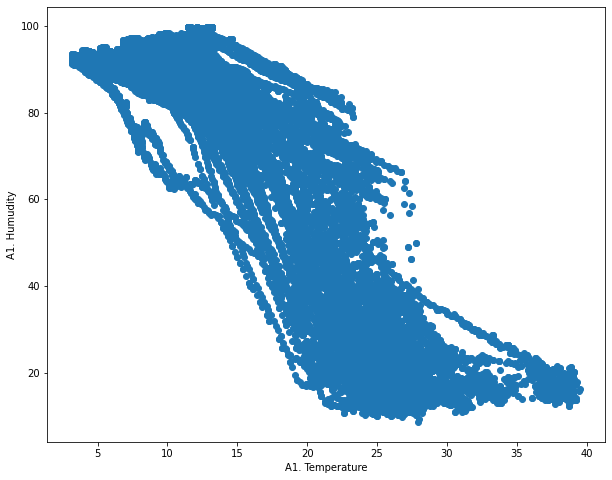

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = new_data['A1. Temp. (°C)'], y = new_data['A1. Humidity (%)'])
plt.xlabel('A1. Temperature')
plt.ylabel('A1. Humudity')


Text(0, 0.5, 'A3. Humudity')

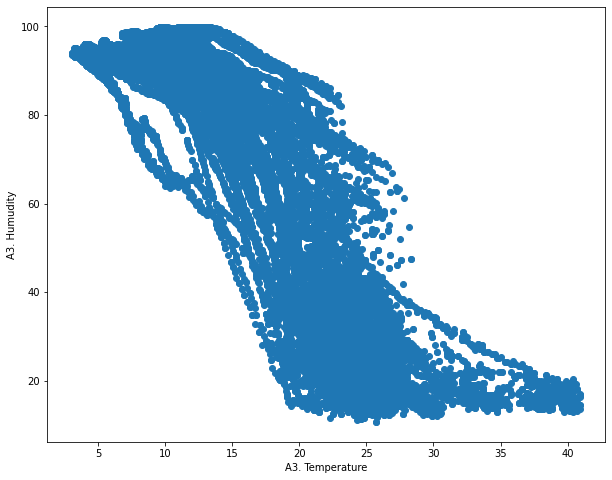

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = new_data['A3. Temp. (°C)'], y = new_data['A3.  Humidity (%)'])
plt.xlabel('A3. Temperature')
plt.ylabel('A3. Humudity')

Text(0, 0.5, 'A4. Humudity')

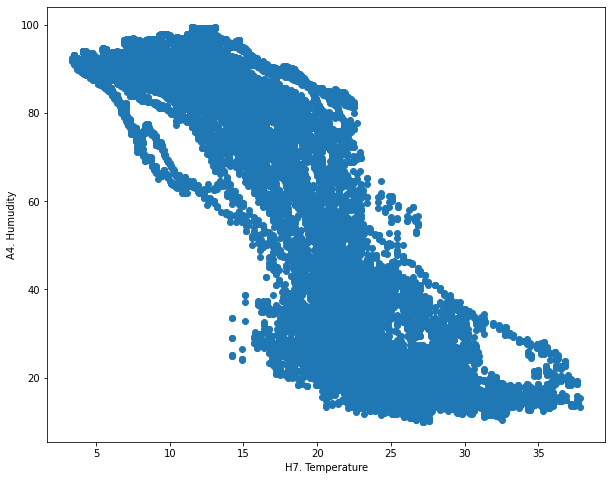

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = new_data['H7. Temp. (°C)'], y = new_data['A4.  Humidity (%)'])
plt.xlabel('H7. Temperature')
plt.ylabel('A4. Humudity')

It is noticed that almost all the temperature and humidity data has the same pattern. ( a negative correlation)

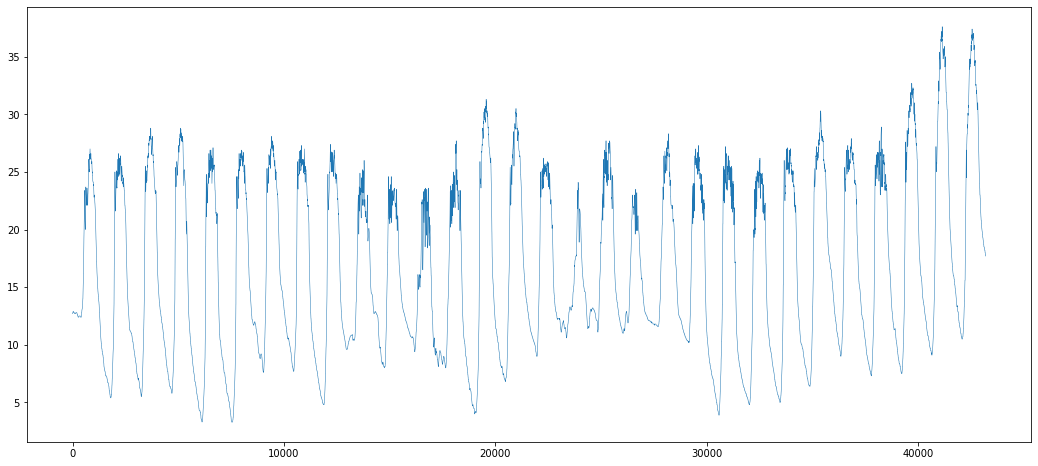

In [ ]:
plt.figure(figsize=(18,8))
new_data['C3. Temp. (°C)'].plot(linewidth=0.5);

A rise in temeprature on the 17th through to 21, and then a rise again on the 1st of May.

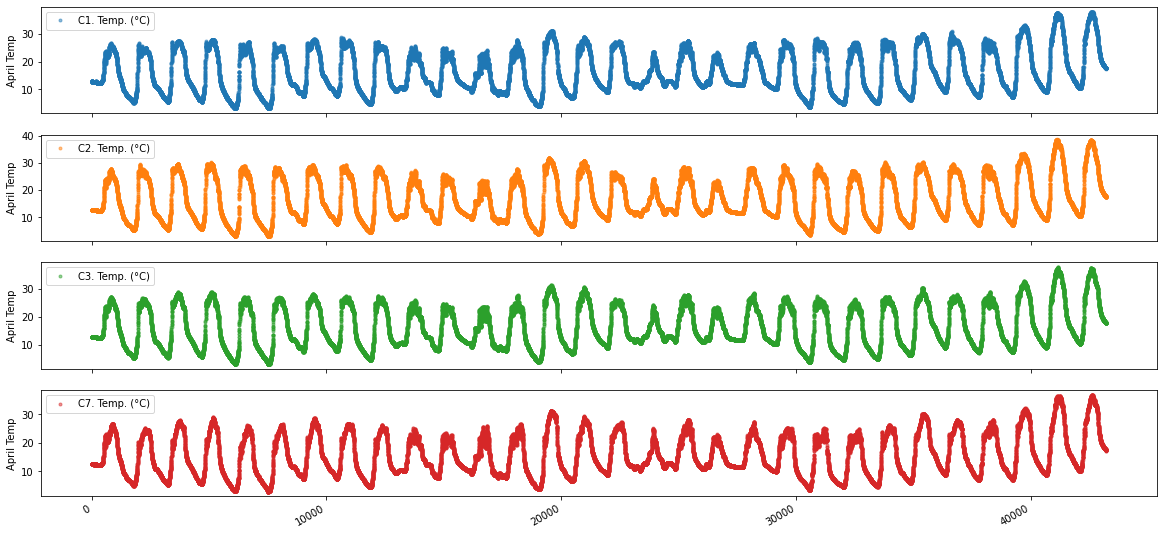

In [ ]:
cols_plot = ['C1. Temp. (°C)', 'C2. Temp. (°C)','C3. Temp. (°C)','C7. Temp. (°C)']
axes = new_data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('April Temp')

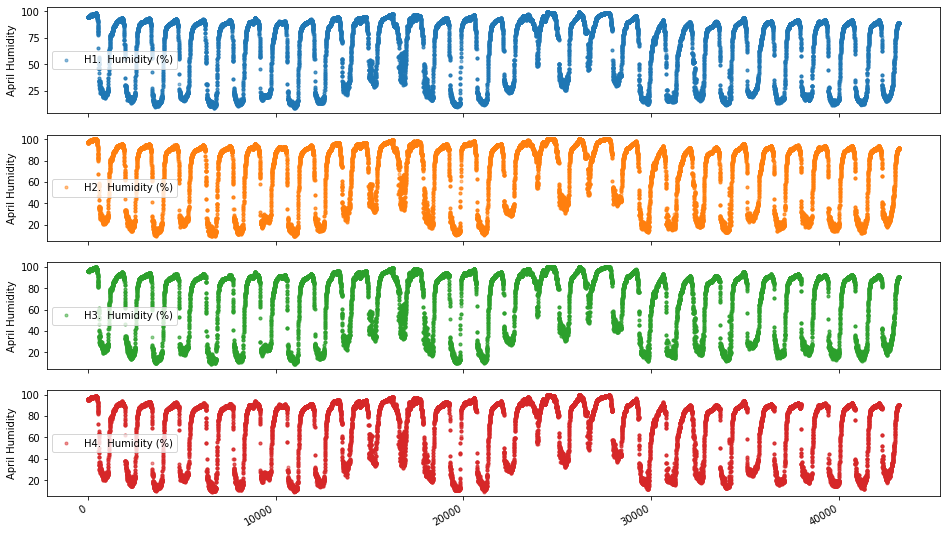

In [ ]:
cols_plot = ['H1.  Humidity (%)','H2.  Humidity (%)','H3.  Humidity (%)','H4.  Humidity (%)']
axes = new_data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('April Humidity')

same pattern is noticed for all

## Model

In [ ]:
# epsilon greedy strategy to select action
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [ ]:
tem = Tem_data.values
tem

array([[12.7, 12.8, 12.6, ..., 12.3, 12.5, 12.5],
       [12.7, 12.9, 12.6, ..., 12.4, 12.5, 12.5],
       [12.7, 12.9, 12.7, ..., 12.4, 12.6, 12.5],
       ...,
       [17.5, 17.7, 17.5, ..., 17.3, 17.5, 17.8],
       [17.5, 17.7, 17.4, ..., 17.3, 17.5, 17.7],
       [17.5, 17.7, 17.4, ..., 17.2, 17.5, 17.7]])

In [ ]:
tem.shape

(37463, 56)

In [ ]:
from collections import defaultdict
import numpy as np


In [ ]:
# policy and value initialization
action_dim = 60
state_dim = 56
epsilon = 0.1

init_state = np.random.randint(0,action_dim)
policy = np.random.randint(state_dim, action_dim)


# the recorded maximum
Fmax=0
    
# number of episodes
N=0

# max episodes and timesteps
Nmax = 1000
Tmax = 10000     # the duration of each episodes

# initialize q value_function
Q = defaultdict(lambda: np.zeros(action_dim))

# The policy we're following
policy = make_epsilon_greedy_policy(Q, epsilon, action_dim)
while N<=Nmax:
    t=f=0
    while t<=Tmax and f<=Fmax:
        t=1
        current_state = np.random.randint(0,action_dim)

        
        # Take a step (q-l, not sarsa)
        probs = policy(current_state)
        action = np.random.choice(np.arange(len(probs)), p=probs)
        next_state, reward, done, _ = env.step(action)
        
        # TD update
        best_next_action = np.argmax(Q[next_state])
        
        
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        td_delta = td_target - Q[state][action]
        Q[state][action] += alpha * td_delta 
        if done:
                break
                
        state = next_state
        
    # spacial objective function
    if f>Fmax:
        Fmax=f
        S_optimal = s
        N=0
    else:
        N+=1

# S_optimal is the optimal state which contain the location of n optimal sensor

NameError: ignored

work in progress...

# ***what I saw as a sample***

In [ ]:
np.empty(0)

array([], dtype=float64)

In [ ]:
temp_val= Tem_data.values

In [ ]:
# Import required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Define Action class 
class Actions: 
  def __init__(self, m): 
    self.m = m 
    self.mean = 0
    self.N = 0
  
  # Choose a random action 
  def choose(self):  
    return np.random.randn() + self.m 
  
  # Update the action-value estimate 
  def update(self, x): 
    self.N += 1
    self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x 
  
  
def run_experiment(m1, m2, m3, eps, N): 
      
  actions = [Actions(m1), Actions(m2), Actions(m3)] 
  
  data = np.empty(N) 
    
  for i in range(N): 
    # epsilon greedy 
    p = np.random.random() 
    if p < eps: 
      j = np.random.choice(3) 
    else: 
      j = np.argmax([a.mean for a in actions]) 
    x = actions[j].choose() 
    actions[j].update(x) 
  
    # for the plot 
    data[i] = x 
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 
  
  # plot moving average ctr 
  plt.plot(cumulative_average) 
  plt.plot(np.ones(N)*m1) 
  plt.plot(np.ones(N)*m2) 
  plt.plot(np.ones(N)*m3) 
  plt.xscale('log') 
  plt.show() 
  
  for a in actions: 
    print(a.mean) 
  
  return cumulative_average

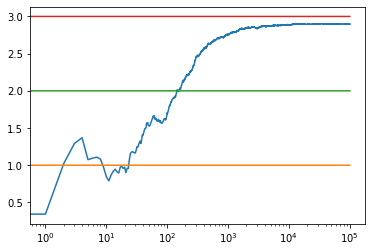

1.0037160463795984
1.9876974225649122
2.997707787193908


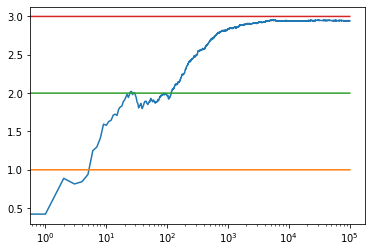

1.0073333804383422
2.0159740646926774
2.9968051962899547


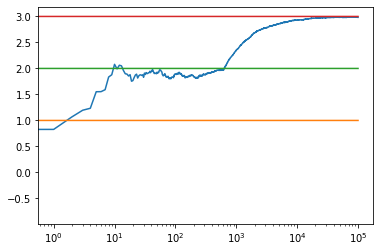

0.9797095649357129
1.982458103033144
2.99940477936517


In [ ]:
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000) 
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000) 
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

In [ ]:
# linear programming

In [ ]:
import cvxpy as cp

In [ ]:
D = Tem_data.values
m, n = D.shape
x = cp.Variable( n , boolean=True)
alpha = 0.7
beta = 0.4

def norm(A):
    return (np.sum(A**2))*0.5

def frobenius_norm(A):
  return norm(A)

def spectral_norm(A):
  _, _ , sigma = power_iteration(A)
  return sigma

def power_iteration(A, niter = 50):
    u = np.random.randn(m)
    for i in range(niter):
        print("Hello", i) 
        dot_product_Au = A.T @ u
        v = dot_product_Au / norm(dot_product_Au)
        print (v)
        dot_product_Av = A @ v
        u = dot_product_Av / norm(dot_product_Av)
            
    return u, v, u.T @ A @ v


def stable_rank(A):
  return frobenius_norm(A)*2/ spectral_norm(A)*2

# D_int = D.astype(int)

w = np.ones((n,1)).T @ x
print(w)

D_ = cp.atoms.affine.binary_operators.multiply(D, w) 
objective = cp.Maximize((alpha * stable_rank(D_)) + (beta *  cp.sum(x)))
constraints = [x>0]
prob = cp.Problem(objective,constraints)
prob.solve()
print(x.value)

ValueError: ignored

In [ ]:
# def power_iteration (A, num_simulations ):
#  # Ideally choose a random vector
#  # To decrease the chance that our vector
#  # Is orthogonal to the eigenvector
#  b_k = np.random.rand(A.shape[0])
#  for _ in range(num_simulations ):
#  # calculate the matrix-by-vector product Ab
#   b_k1 = np.dot(A, b_k)
#   # calculate the norm
#   b_k1_norm = np.linalg.norm(b_k1)
#   # re normalize the vector
#   b_k = b_k1 / b_k1_norm
#   return b_k

# power_iteration (D, 10)

In [ ]:
# import numpy as np
# import scipy.sparse as sp
# import time

# def power_iteration(A, niter = 50):
#   tol = 10**(-9)
#   Ashape = A.shape
#   eigvec = np.random.rand(Ashape[0])
#   eigval_old = np.dot(np.transpose(eigvec),A.dot(eigvec))/np.dot(np.transpose(eigvec),eigvec)
#   for i in range(niter):
#         	# calculate the matrix-by-vector product Ab
#     eigvec1 = A.dot(eigvec)
#         	# calculate the norm
#     eigvec1_norm = np.linalg.norm(eigvec1)
#         	# re normalize the vector
#     eigvec = eigvec1 / eigvec1_norm
# 		#eigenvalue
#     eigval_new = np.dot(np.transpose(eigvec),A.dot(eigvec))/np.dot(np.transpose(eigvec),eigvec)
#     if (abs(eigval_new-eigval_old)/eigval_new) < tol:
#       return eigval_new
#     eigval_old = eigval_new
#   return eigval_new

# # def get_maxeigval(A):
# # 	niter = 200000
# # 	return power_iteration(A,niter)

In [ ]:
# get_maxeigval(A)
power_iteration(A)

NameError: ignored